# Project : Heart Attack

* Attribute Information: -- Only 14 used 
    - 1.  (age)  age in years
    - 2.  (sex) sex (1 = male; 0 = female)
    - 3.  (cp) chest pain type 
                -- Value 1: typical angina 
                -- Value 2: atypical angina 
                -- Value 3: non-anginal pain 
                -- Value 4: asymptomatic
    - 4.  (trestbps)  resting blood pressure (in mm Hg on admission to the hospital) 
    - 5.  (chol) : serum cholestoral in mg/dl 
    - 6.  (fbs) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    - 7.  (restecg) : resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - 8.  (thalach) : maximum heart rate achieved
    - 9.  (exang) : exercise induced angina (1 = yes; 0 = no)
    - 10.  (oldpeak)  oldpeak = ST depression induced by exercise relative to rest 
    - 11.  (slope) : the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
    - 12.  (ca) : number of major vessels (0-3) colored by flourosopy 
    - 13.  (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect 
    - 14.  (num) (the predicted attribute) : diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Load the dataset

df = pd.read_csv("data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Data Exploration

In [4]:
# Display a description of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
num         297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df.shape

(297, 14)

## (1 = male; 0 = female)

In [7]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

## The percentage of Female and Male on our data.

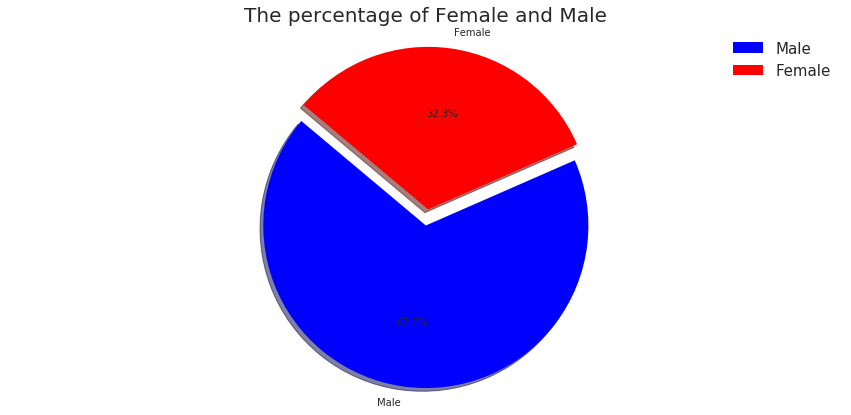

In [8]:
plt.figure(figsize=(15,7))
 
# Data to plot
labels = 'Male', 'Female'
sizes = [201,96]
colors = ['blue', 'red']
explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of Female and Male',fontsize=20)
plt.legend(('Male', 'Female'),fontsize=15)
plt.axis('equal')
plt.show()

* The percentage of **Male** 67.7% more than **Female** on our data 32.3%.

In [9]:
df['age'].unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76])

In [10]:
print(df['age'].max())
print(df['age'].min())


77
29


In [11]:
df['bin_of_age'] = pd.cut(df['age'], [25,35,45,55,65,75,85], labels=['25-35', '35-45', '45-55', '55-65', '65-75', '75-85'])


In [12]:
df.groupby([df["bin_of_age"],df['num']]).count()

age   sex    cp  trestbps  chol   fbs  restecg  thalach  \
bin_of_age num                                                             
25-35      0     5.0   5.0   5.0       5.0   5.0   5.0      5.0      5.0   
           1     2.0   2.0   2.0       2.0   2.0   2.0      2.0      2.0   
           2     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
           3     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
           4     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
35-45      0    41.0  41.0  41.0      41.0  41.0  41.0     41.0     41.0   
           1     4.0   4.0   4.0       4.0   4.0   4.0      4.0      4.0   
           2     4.0   4.0   4.0       4.0   4.0   4.0      4.0      4.0   
           3     4.0   4.0   4.0       4.0   4.0   4.0      4.0      4.0   
           4     1.0   1.0   1.0       1.0   1.0   1.0      1.0      1.0   
45-55      0    53.0  53.0  53.0      53.0  53.0  53.0     53.0     53.0   
           1    13.0  13.0  13.0      13.0  13.0  13.0     13.0     13.0   
           2     4.0   4.0   4.0       4.0   4.0   4.0      4.0      4.0   
           3    13.0  13.0  13.0      13.0  13.0  13.0     13.0     13.0   
           4     2.0   2.0   2.0       2.0   2.0   2.0      2.0      2.0   
55-65      0    44.0  44.0  44.0      44.0  44.0  44.0     44.0     44.0   
           1    32.0  32.0  32.0      32.0  32.0  32.0     32.0     32.0   
           2    21.0  21.0  21.0      21.0  21.0  21.0     21.0     21.0   
           3    13.0  13.0  13.0      13.0  13.0  13.0     13.0     13.0   
           4     8.0   8.0   8.0       8.0   8.0   8.0      8.0      8.0   
65-75      0    16.0  16.0  16.0      16.0  16.0  16.0     16.0     16.0   
           1     3.0   3.0   3.0       3.0   3.0   3.0      3.0      3.0   
           2     6.0   6.0   6.0       6.0   6.0   6.0      6.0      6.0   
           3     5.0   5.0   5.0       5.0   5.0   5.0      5.0      5.0   
           4     1.0   1.0   1.0       1.0   1.0   1.0      1.0      1.0   
75-85      0     1.0   1.0   1.0       1.0   1.0   1.0      1.0      1.0   
           1     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
           2     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
           3     NaN   NaN   NaN       NaN   NaN   NaN      NaN      NaN   
           4     1.0   1.0   1.0       1.0   1.0   1.0      1.0      1.0   

                exang  oldpeak  slope    ca  thal  
bin_of_age num                                     
25-35      0      5.0      5.0    5.0   5.0   5.0  
           1      2.0      2.0    2.0   2.0   2.0  
           2      NaN      NaN    NaN   NaN   NaN  
           3      NaN      NaN    NaN   NaN   NaN  
           4      NaN      NaN    NaN   NaN   NaN  
35-45      0     41.0     41.0   41.0  41.0  41.0  
           1      4.0      4.0    4.0   4.0   4.0  
           2      4.0      4.0    4.0   4.0   4.0  
           3      4.0      4.0    4.0   4.0   4.0  
           4      1.0      1.0    1.0   1.0   1.0  
45-55      0     53.0     53.0   53.0  53.0  53.0  
           1     13.0     13.0   13.0  13.0  13.0  
           2      4.0      4.0    4.0   4.0   4.0  
           3     13.0     13.0   13.0  13.0  13.0  
           4      2.0      2.0    2.0   2.0   2.0  
55-65      0     44.0     44.0   44.0  44.0  44.0  
           1     32.0     32.0   32.0  32.0  32.0  
           2     21.0     21.0   21.0  21.0  21.0  
           3     13.0     13.0   13.0  13.0  13.0  
           4      8.0      8.0    8.0   8.0   8.0  
65-75      0     16.0     16.0   16.0  16.0  16.0  
           1      3.0      3.0    3.0   3.0   3.0  
           2      6.0      6.0    6.0   6.0   6.0  
           3      5.0      5.0    5.0   5.0   5.0  
           4      1.0      1.0    1.0   1.0   1.0  
75-85      0      1.0      1.0    1.0   1.0   1.0  
           1      NaN      NaN    NaN   NaN   NaN  
           2      NaN      NaN    NaN   NaN   NaN  
           3      NaN   

In [13]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [14]:
len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 1)])+len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 2)])

2

In [15]:
df['bin_of_age'].value_counts()

55-65    118
45-55     85
35-45     54
65-75     31
25-35      7
75-85      2
Name: bin_of_age, dtype: int64

## The percentage for the age range with heart disease

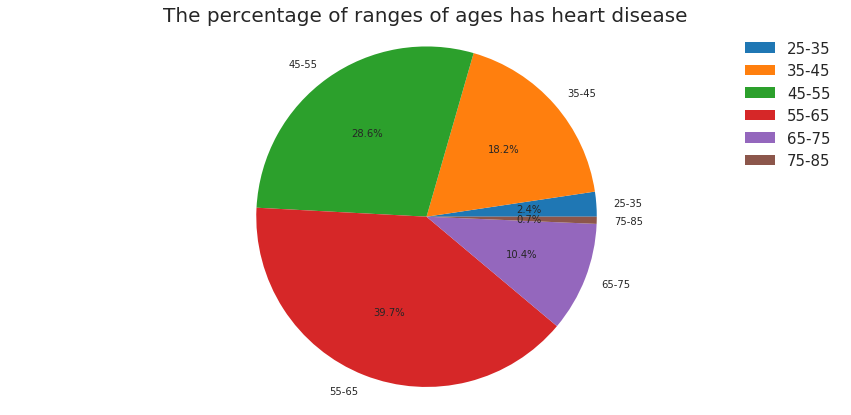

In [16]:
plt.figure(figsize=(15,7))

# Data to plot
labels = '25-35', '35-45', '45-55', '55-65', '65-75', '75-85'
sizes = [7,54,85,118,31,2]

 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of ranges of ages has heart disease',fontsize=20)
plt.legend(('25-35', '35-45', '45-55', '55-65', '65-75', '75-85'),fontsize=15)
plt.axis('equal')
plt.show()

* The people with and with not heart disease between the ages **55-65** has the highest percentage of **39.7%**.
* The people with and with not heart disease between the ages **75-85** has the lowest percentage of **0.7%**.


In [17]:
#ranges of ages with heart disease without level 0
print(len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 3)])+
      len(df[(df['bin_of_age'] == '25-35') & (df['num'] == 4)]),'\n')
#25-35 2
print(len(df[(df['bin_of_age'] == '35-45') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '35-45') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '35-45') & (df['num'] == 3)])+
len(df[(df['bin_of_age'] == '35-45') & (df['num'] == 4)]),'\n')
#35-45 13
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 3)])+
len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 4)]),'\n')
#45-55 32
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 3)])+
len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 4)]),'\n')
# 74
print(len(df[(df['bin_of_age'] == '65-75') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '65-75') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '65-75') & (df['num'] == 3)])+
len(df[(df['bin_of_age'] == '65-75') & (df['num'] == 4)]),'\n')
#15
print(len(df[(df['bin_of_age'] == '75-85') & (df['num'] == 1)])+
len(df[(df['bin_of_age'] == '75-85') & (df['num'] == 2)])+
len(df[(df['bin_of_age'] == '75-85') & (df['num'] == 3)])+
len(df[(df['bin_of_age'] == '75-85') & (df['num'] == 4)]))
#1

2 

13 

32 

74 

15 

1


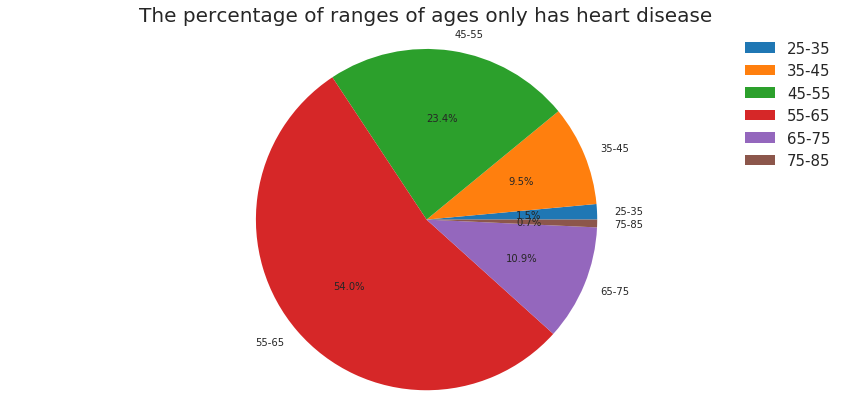

In [18]:
plt.figure(figsize=(15,7))

# Data to plot
labels = '25-35', '35-45', '45-55', '55-65', '65-75', '75-85'
sizes = [2,13,32,74,15,1]
#colors = ['blue', 'red']
#explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of ranges of ages only has heart disease',fontsize=20)
plt.legend(('25-35', '35-45', '45-55', '55-65', '65-75', '75-85'),fontsize=15)

plt.axis('equal')
plt.show()

* The people with heart disease between the ages **55-65** has the highest percentage of **54%**.
* The people with heart disease between the ages **75-85** has the lowest percentage of **0.7%**.


In [19]:
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 0)]))
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 1)]))
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 2)]))
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 3)]))
print(len(df[(df['bin_of_age'] == '55-65') & (df['num'] == 4)]))

44
32
21
13
8


## The highest percentage of people with heart disease are those at the age of 55-65

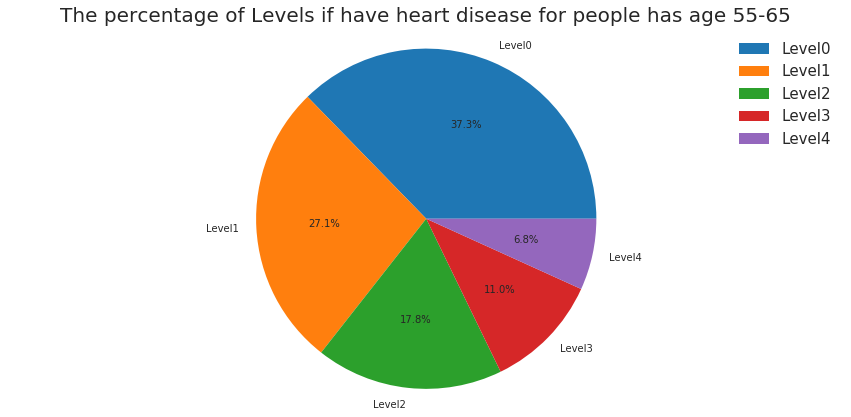

In [20]:
plt.figure(figsize=(15,7))

# Data to plot
labels = 'Level0', 'Level1', 'Level2', 'Level3', 'Level4'
sizes = [44,32,21,13,8]
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of Levels if have heart disease for people has age 55-65',fontsize=20)
plt.legend(('Level0', 'Level1', 'Level2', 'Level3', 'Level4'),fontsize=15)
plt.axis('equal')
plt.show()

* The people without heart disease between the ages **55-65** has percentage of **37.3%**.
* The people with heart disease between the ages **55-65** has percentage of **62.7%**.


## The second highest percentage of people with heart disease are those at the age of 45-55

In [21]:
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 0)]))
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 1)]))
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 2)]))
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 3)]))
print(len(df[(df['bin_of_age'] == '45-55') & (df['num'] == 4)]))

53
13
4
13
2


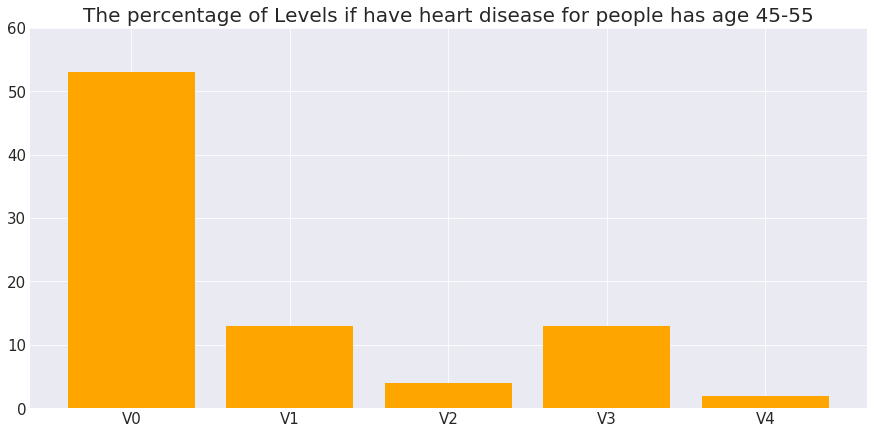

In [50]:
plt.figure(figsize=(15,7))

plt.bar(np.arange(5), [53,13,4,13,2],color='orange')
plt.xticks(np.arange(5) , ('V0', 'V1', 'V2', 'V3', 'V4'),fontsize=15)
plt.yticks(np.arange(0, 70, 10),fontsize=15)
plt.title('The percentage of Levels if have heart disease for people has age 45-55',fontsize=20)

plt.show()

* The people without heart disease between the ages **45-55** has **53**.
* The people with heart disease between the ages **45-55** has **32**.


In [23]:
len(df['age'].unique())

41

In [24]:
len(df['num'].unique())

5

## The relation between gender and heart disease:

In [25]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [26]:
#male
print(len(df[(df['num'] == 0) & (df['sex'] == 1)]))
print(len(df[(df['num'] == 1) & (df['sex'] == 1)]))
print(len(df[(df['num'] == 2) & (df['sex'] == 1)]))
print(len(df[(df['num'] == 3) & (df['sex'] == 1)]))
print(len(df[(df['num'] == 4) & (df['sex'] == 1)]))


89
45
28
28
11


In [27]:
#female
print(len(df[(df['num'] == 0) & (df['sex'] == 0)]))
print(len(df[(df['num'] == 1) & (df['sex'] == 0)]))
print(len(df[(df['num'] == 2) & (df['sex'] == 0)]))
print(len(df[(df['num'] == 3) & (df['sex'] == 0)]))
print(len(df[(df['num'] == 4) & (df['sex'] == 0)]))


71
9
7
7
2


In [28]:
df.groupby([df['sex'],df['num']]).count()
#0 female
#1 male

age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
sex num                                                                   
0   0     71  71        71    71   71       71       71     71       71   
    1      9   9         9     9    9        9        9      9        9   
    2      7   7         7     7    7        7        7      7        7   
    3      7   7         7     7    7        7        7      7        7   
    4      2   2         2     2    2        2        2      2        2   
1   0     89  89        89    89   89       89       89     89       89   
    1     45  45        45    45   45       45       45     45       45   
    2     28  28        28    28   28       28       28     28       28   
    3     28  28        28    28   28       28       28     28       28   
    4     11  11        11    11   11       11       11     11       11   

         slope  ca  thal  bin_of_age  
sex num                               
0   0       71  71    71          71  
    1        9   9     9           9  
    2        7   7     7           7  
    3        7   7     7           7  
    4        2   2     2           2  
1   0       89  89    89          89  
    1       45  45    45          45  
    2       28  28    28          28  
    3       28  28    28          28  
    4       11  11    11          11

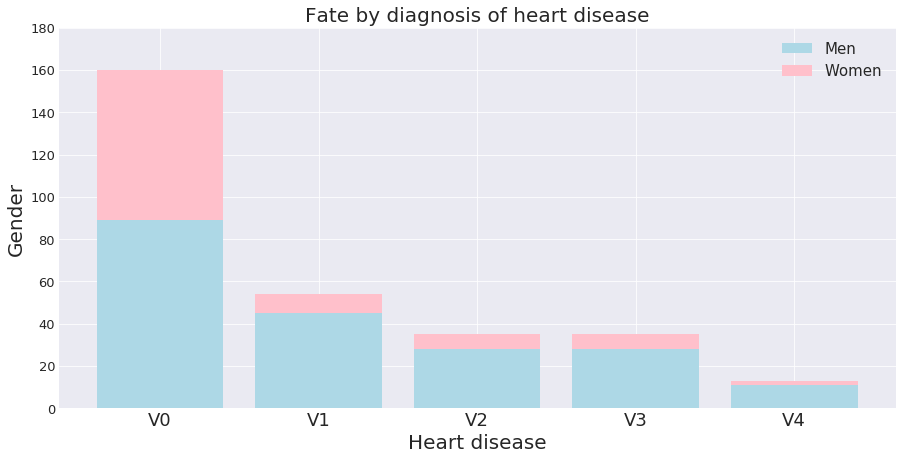

In [29]:
plt.figure(figsize=(15,7))
menMeans = (89,45,28,28,11)
womenMeans = (71,9,7,7,2)

p1 = plt.bar(np.arange(5), menMeans,color='lightblue')
p2 = plt.bar(np.arange(5), womenMeans,color='pink', bottom=menMeans)

plt.xlabel('Heart disease',fontsize=20)
plt.ylabel('Gender',fontsize=20)

plt.title('Fate by diagnosis of heart disease',fontsize=20)
plt.xticks(np.arange(5) , ('V0', 'V1', 'V2', 'V3', 'V4'),fontsize=18)
plt.yticks(np.arange(0, 200, 20),fontsize=13)
plt.legend((p1[0], p2[0]), ('Men', 'Women'),fontsize=15)

plt.show()

### This plot explain the relation between gender and heart disease:
   * The highest percentage is **male** has the highest percentage of **heart disease**.
   * The lowest percentage is **female** has the lowest percentage of **heart disease**.

In [30]:
print(df['chol'].unique().max())
print(df['chol'].unique().min())

564
126


## Different between female and male drink alchol
- chol: serum cholestoral in mg/dl

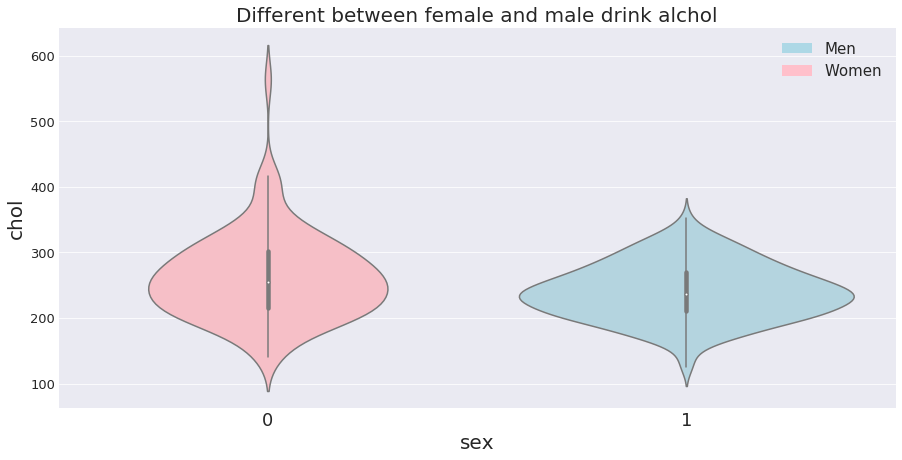

In [31]:
plt.figure(figsize=(15,7))
plt.title('Different between female and male drink alchol',fontsize=20)
plt.xlabel('Sex',fontsize=20)
plt.ylabel('CHOL',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=13)
plt.legend((p1[0], p2[0]), ('Men', 'Women'),fontsize=15)
sns.violinplot("sex", "chol", data=df,palette=["lightpink", "lightblue"])


* This plot explain **male** more than **female** but **female** has serum cholestoral in mg/dl more than **male**. 

## cp: chest pain type 
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic 

In [32]:
df['cp'].unique()

array([1, 4, 3, 2])

In [33]:
#
print(len(df[(df['num'] == 0) & (df['cp'] == 1)]))
print(len(df[(df['num'] == 1) & (df['cp'] == 1)]))
print(len(df[(df['num'] == 2) & (df['cp'] == 1)]))
print(len(df[(df['num'] == 3) & (df['cp'] == 1)]))
print(len(df[(df['num'] == 4) & (df['cp'] == 1)]),'\n')
#
print(len(df[(df['num'] == 0) & (df['cp'] == 2)]))
print(len(df[(df['num'] == 1) & (df['cp'] == 2)]))
print(len(df[(df['num'] == 2) & (df['cp'] == 2)]))
print(len(df[(df['num'] == 3) & (df['cp'] == 2)]))
print(len(df[(df['num'] == 4) & (df['cp'] == 2)]),'\n')

print(len(df[(df['num'] == 0) & (df['cp'] == 3)]))
print(len(df[(df['num'] == 1) & (df['cp'] == 3)]))
print(len(df[(df['num'] == 2) & (df['cp'] == 3)]))
print(len(df[(df['num'] == 3) & (df['cp'] == 3)]))
print(len(df[(df['num'] == 4) & (df['cp'] == 3)]),'\n')

print(len(df[(df['num'] == 0) & (df['cp'] == 4)]))
print(len(df[(df['num'] == 1) & (df['cp'] == 4)]))
print(len(df[(df['num'] == 2) & (df['cp'] == 4)]))
print(len(df[(df['num'] == 3) & (df['cp'] == 4)]))
print(len(df[(df['num'] == 4) & (df['cp'] == 4)]),'\n')



16
5
1
0
1 

40
6
1
2
0 

65
9
4
4
1 

39
34
29
29
11 



In [34]:
df.groupby([df["num"],df['cp']]).count()

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
num cp                                                                    
0   1    16   16        16    16   16       16       16     16       16   
    2    40   40        40    40   40       40       40     40       40   
    3    65   65        65    65   65       65       65     65       65   
    4    39   39        39    39   39       39       39     39       39   
1   1     5    5         5     5    5        5        5      5        5   
    2     6    6         6     6    6        6        6      6        6   
    3     9    9         9     9    9        9        9      9        9   
    4    34   34        34    34   34       34       34     34       34   
2   1     1    1         1     1    1        1        1      1        1   
    2     1    1         1     1    1        1        1      1        1   
    3     4    4         4     4    4        4        4      4        4   
    4    29   29        29    29   29       29       29     29       29   
3   2     2    2         2     2    2        2        2      2        2   
    3     4    4         4     4    4        4        4      4        4   
    4    29   29        29    29   29       29       29     29       29   
4   1     1    1         1     1    1        1        1      1        1   
    3     1    1         1     1    1        1        1      1        1   
    4    11   11        11    11   11       11       11     11       11   

        slope  ca  thal  bin_of_age  
num cp                               
0   1      16  16    16          16  
    2      40  40    40          40  
    3      65  65    65          65  
    4      39  39    39          39  
1   1       5   5     5           5  
    2       6   6     6           6  
    3       9   9     9           9  
    4      34  34    34          34  
2   1       1   1     1           1  
    2       1   1     1           1  
    3       4   4     4           4  
    4      29  29    29          29  
3   2       2   2     2           2  
    3       4   4     4           4  
    4      29  29    29          29  
4   1       1   1     1           1  
    3       1   1     1           1  
    4      11  11    11          11

In [35]:
df['cp'].value_counts()

4    142
3     83
2     49
1     23
Name: cp, dtype: int64

In [36]:
print(len(df[(df['num'] == 0) ]))
print(len(df[(df['num'] == 1) ]))
print(len(df[(df['num'] == 2) ]))
print(len(df[(df['num'] == 3) ]))
print(len(df[(df['num'] == 4) ]))

160
54
35
35
13


## Fate by diagnosis of heart disease

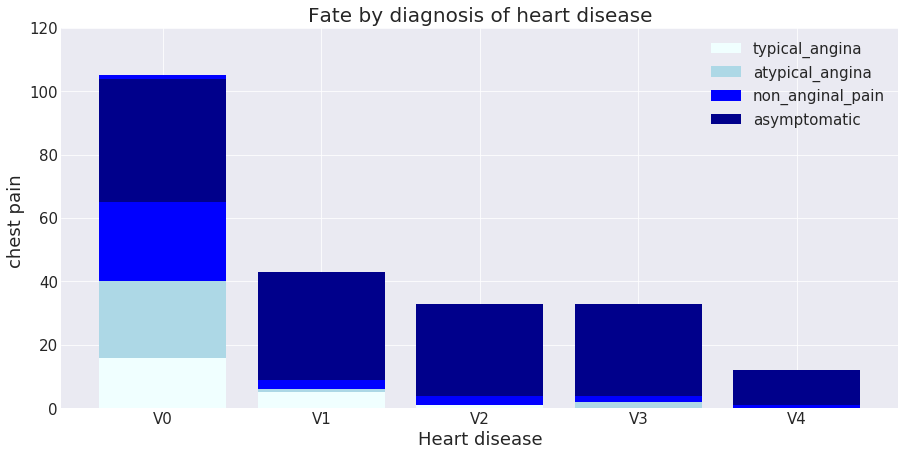

In [37]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
typical_angina = (16,5,1,0,1)
atypical_angina = (40,6,1,2,0 )
non_anginal_pain = (65,9,4,4,1)
asymptomatic = (39,34,29,29,11)

p1 = plt.bar(np.arange(5), typical_angina,color='azure')
p2 = plt.bar(np.arange(5), atypical_angina,color='lightblue', bottom=typical_angina)
p3 = plt.bar(np.arange(5), non_anginal_pain,color='blue', bottom=atypical_angina)
p4 = plt.bar(np.arange(5), asymptomatic,color='darkblue', bottom=non_anginal_pain)

plt.xlabel('Heart disease',fontsize=18)
plt.ylabel('chest pain ',fontsize=18)

plt.title('Fate by diagnosis of heart disease',fontsize=20)
plt.xticks(np.arange(5) , ('V0', 'V1', 'V2', 'V3', 'V4'),fontsize=15)
plt.yticks(np.arange(0, 130, 20),fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('typical_angina','atypical_angina','non_anginal_pain', 'asymptomatic'),fontsize=15)

plt.show()


* This plot explain relation between chest pain and Heart disease:
    - The highest persentage is 'value 0: < 50% diameter narrowing' in **diagnosis of heart disease** that main peaple are okay.
    - The lowest persentage is 'value 4 : > 50% diameter narrowing is 13' in **diagnosis of heart disease**. 
    - The highest persentage is 'value 4: asymptomatic is 39' in **chest pain**.
    - The lowest persentage is 'value 1: typical angina is 16' in **chest pain**.

In [38]:
df.iloc[:,:7]

,age,sex,cp,trestbps,chol,fbs,restecg
0,63,1,1,145,233,1,2
1,67,1,4,160,286,0,2
2,67,1,4,120,229,0,2
3,37,1,3,130,250,0,0
4,41,0,2,130,204,0,2
5,56,1,2,120,236,0,0
6,62,0,4,140,268,0,2
7,57,0,4,120,354,0,0
8,63,1,4,130,254,0,2
9,53,1,4,140,203,1,2


# Visualize Feature Distributions
## Correlation between features

/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


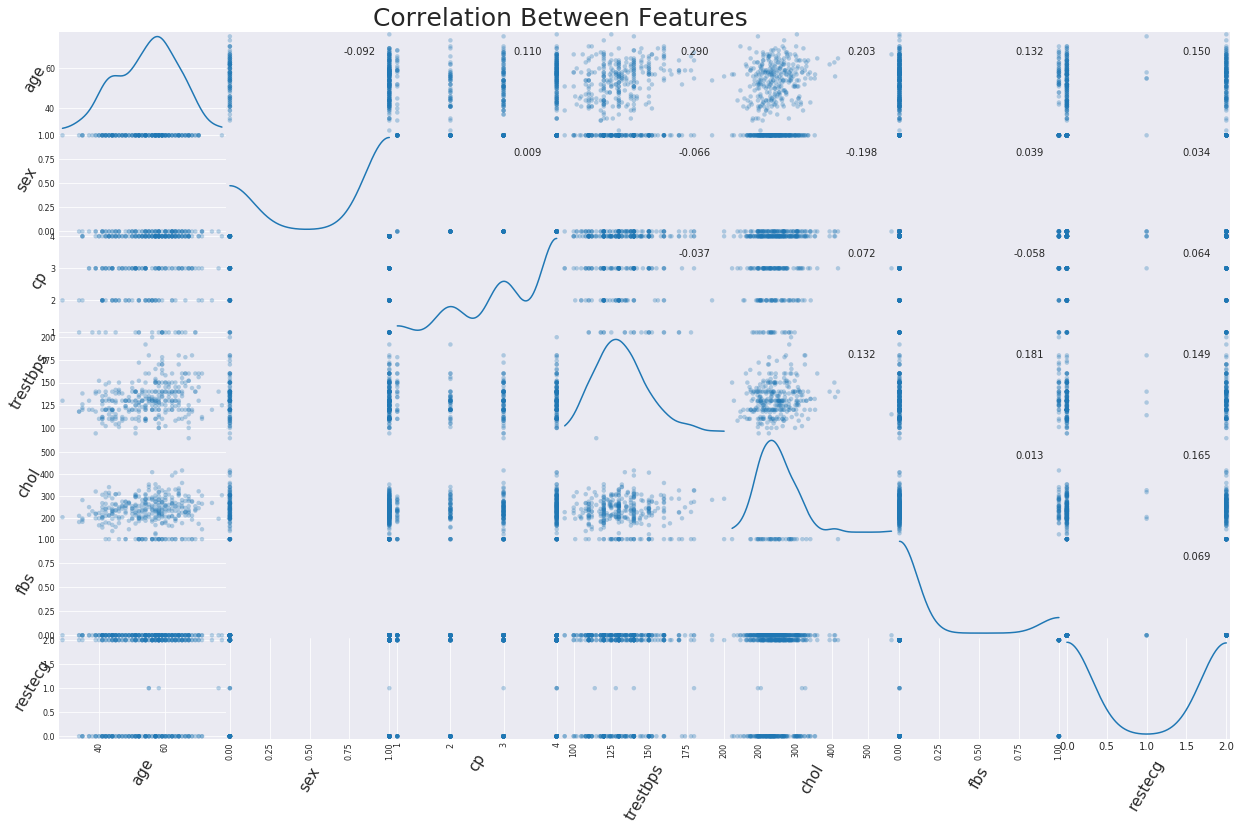

In [51]:

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(df.iloc[:,:7], alpha = 0.3, figsize = (21,13), diagonal = 'kde' ,s=80);
corr = df.iloc[:,:7].corr().as_matrix()
plt.title('Correlation Between Features',x=-3,y=7,fontsize=25)
# to change fontsize 
plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)

# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")
    

* **sex** and **cp** are badly correlated 0.009.

/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


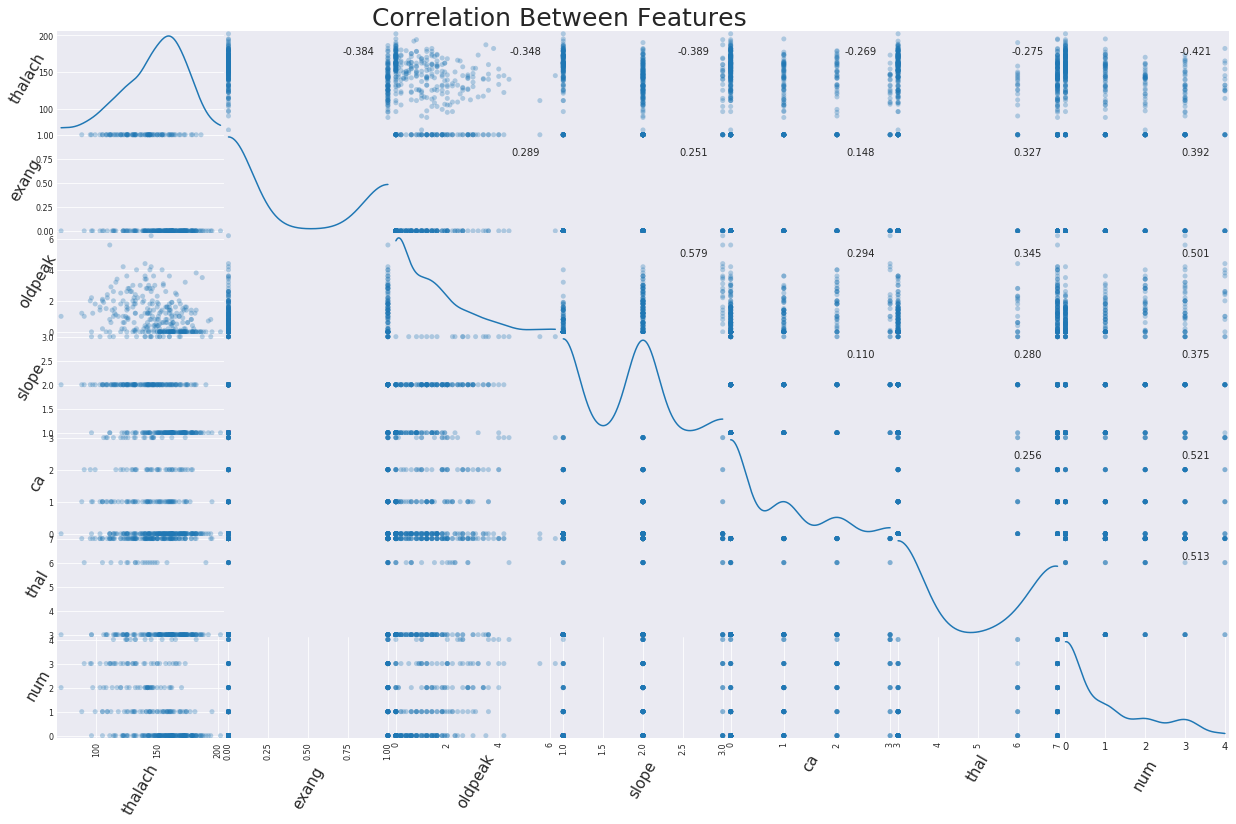

In [40]:

# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(df.iloc[:,7:], alpha = 0.3, figsize = (21,13), diagonal = 'kde',s = 100);
corr = df.iloc[:,7:].corr().as_matrix()
plt.title('Correlation Between Features',x=-3,y=7,fontsize=25)
# to change fontsize 
plt.xticks(fontsize =10,rotation =0)
plt.yticks(fontsize =10)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(),fontsize = 15, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(),fontsize = 15, rotation = 60)
# put the correlation between each pair of variables on each graph
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.8, 0.8), xycoords="axes fraction", ha="center", va="center")

* **slope** and **oldpeak** are highly correlated 0.58.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text yticklabel objects>)

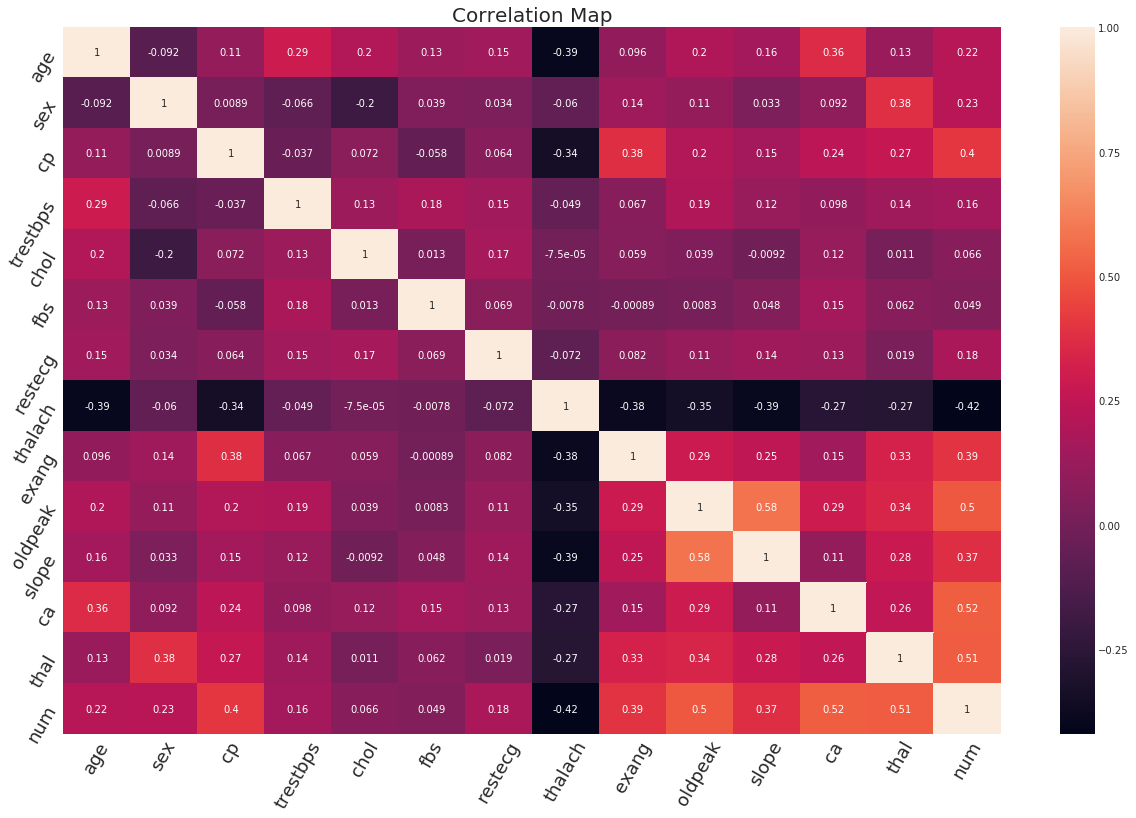

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(21,13))
corr = df.corr()
plt.title('Correlation Map',fontsize=20)
sns.heatmap(corr,annot=True,linecolor='Black')
plt.xticks(fontsize=18,rotation = 60)
plt.yticks(fontsize=18,rotation = 60)

* The most feature doesn't have correlation with other features is **thalach**
* The most feature have correlation with other features is **num**
* **slope** and **oldpeak** are highly correlated 0.58.
